# Make medical figure for abstract

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pestoseis.ttimerays as tr

In [2]:
nrec = 100 # number of receivers
nsrc = 100 # number of sources
rsrc = 0.075 # Radius of source array [m]
rrec = 0.073 # Radius of receiver array [m]
phi = np.arange(0,2 * np.pi,2 * np.pi / float(nsrc)) # angle 
x_src = rsrc * np.cos(phi) 
y_src = rsrc * np.sin(phi)
x_rec = rrec * np.cos(phi) 
y_rec = rrec * np.sin(phi)

sources = np.array([x_src, y_src])
receivers = np.vstack((np.array([(x_rec[0], y_rec[0])]), np.array([(x_rec[50], y_rec[50])])))

In [3]:
### setup grid object
nx = 201 
ny = 201 
dh = 0.001 
xinit = -0.1 
yinit = -0.1 
gridpar = tr.setupgrid(nx,ny,dh,xinit,yinit)

In [4]:
def get_spherical_inclusion(nx,ny):
    """ 
    make a model with spherical inclusions
    Args:
       nx,ny (float,float): sizes of the input 2D model

    Returns:
      (ndarray): the velocity model as a 2D array
      
    """
    
    x = np.linspace(-0.1, +0.1, nx)
    y = np.linspace(-0.1, +0.1, nx)
    xx, yy = np.meshgrid(x, y, indexing="ij")

    # Add 3 spherical inclusions
    vp = 1500.0 * np.ones_like(xx)
    mask = np.sqrt(xx**2 + yy**2) < 0.05
    vp[mask] = 1550.0

    mask = np.sqrt((xx - 0.025) ** 2 + yy ** 2) < 0.015
    vp[mask] = 1600.0

    mask = np.sqrt((xx + 0.025) ** 2 + yy ** 2) < 0.015
    vp[mask] = 1450.0

    return vp

In [5]:
velmod = get_spherical_inclusion(nx,ny)

## Compute the Traveltimes

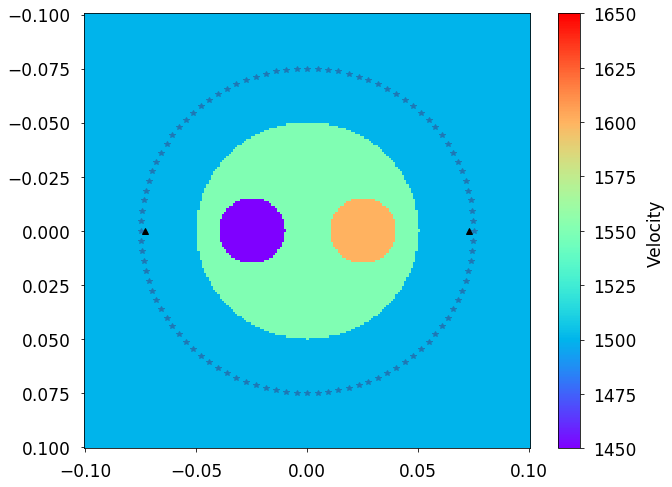

In [17]:
plt.figure(figsize=(10,8))
tr.plotvelmod(gridpar,velmod,vmin=1450,vmax=1650)
plt.plot(sources[0,:],sources[1,:],"*")
plt.plot(receivers[0,0],receivers[0,1],"^k")
plt.plot(receivers[1,0],receivers[1,1],"^k")

In [7]:
# this function needs the shapes of the source and the receiver arrays to match along the second axis
ttpick,ttime = tr.traveltime(velmod, gridpar, sources.T, receivers)

Calculating traveltime for source 100 of 100 


## Trace the Rays

In [8]:
# this function needs the shapes of the source and the receiver arrays to match along the SECOND axis
rays = tr.traceallrays(gridpar, sources.T, receivers, ttime)

tracing rays for source 100 of 100     


In [9]:
# this function needs the shapes of the source and the receiver arrays to match along the FIRST axis
# straightrays = tr.traceall_straight_rays(gridpar, sources.T, receivers)
straightrays = tr.traceall_straight_rays(gridpar, sources.T, receivers)

tracing rays for source 100 of 100     


## Plot the Results

In [10]:
# choose one receiver position (here one out of two)
irec = 0
isrc = 48 # choose the source position 
right_rec = np.vstack([receivers[irec,:],sources.T[isrc:isrc+1,:]])
# trace the rays only to this receiver
rays_right_rec = tr.traceallrays(gridpar, sources.T, right_rec, ttime)

tracing rays for source 100 of 100     


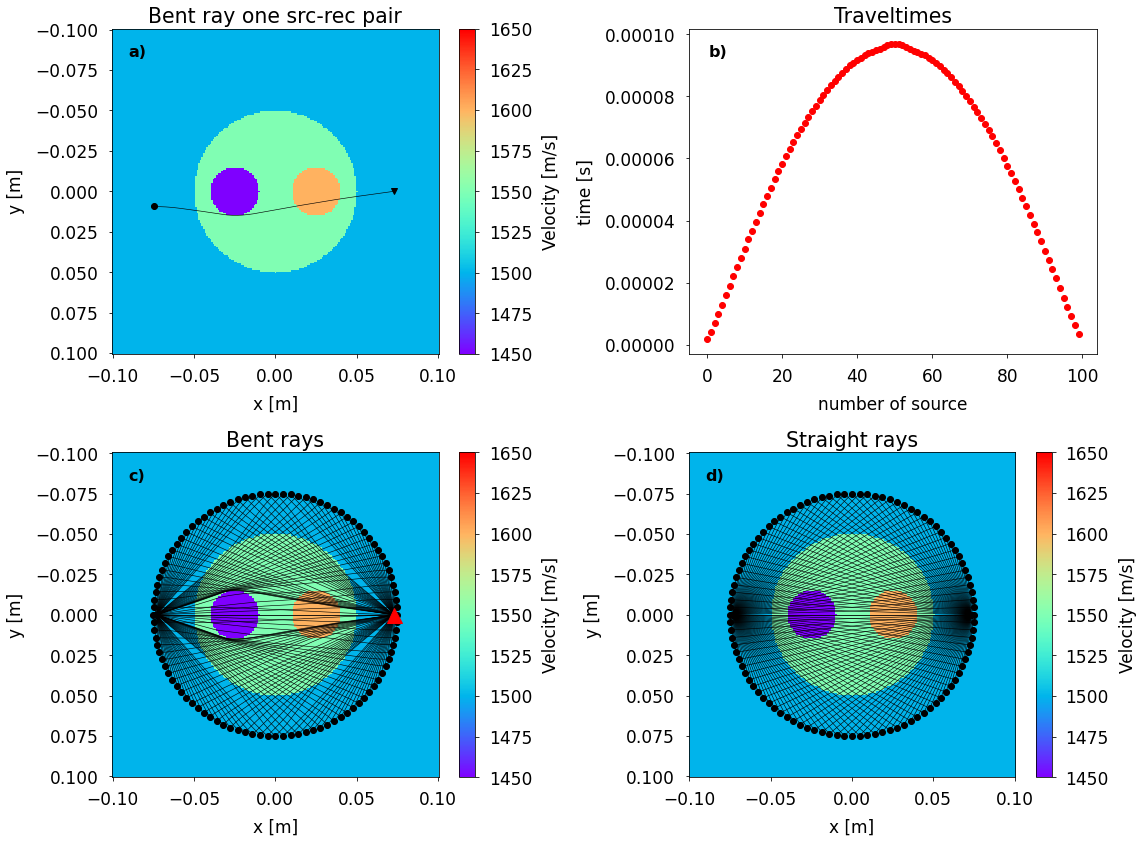

In [16]:
fig = plt.figure(figsize=(16,12))

plt.rcParams.update({"font.size": 17})
plt.rcParams['xtick.major.pad']='10'
plt.rcParams['ytick.major.pad']='10'
plt.rcParams['axes.labelpad']='10'
    
ax0 = fig.add_subplot(2,2,1)
ax0.text(0.05, 0.95, "a)", transform=ax0.transAxes,
fontsize=16, fontweight='bold', va='top')
tr.plotvelmod(gridpar,velmod,vmin=1450,vmax=1650,units="[m/s]")
ax0.plot(sources.T[isrc,0],sources.T[isrc,1],'ok',zorder=100)
for i in range(rays_right_rec.shape[0]) :
    ax0.plot(rays_right_rec[i,isrc]['xy'][:,0],
              rays_right_rec[i,isrc]['xy'][:,1],'-',color='black',linewidth=0.6)
ax0.plot(receivers[0,0],receivers[0,1],'vk',zorder=100)
ax0.set_title("Bent ray one src-rec pair")
ax0.set_xlabel("x [m]")
ax0.set_ylabel("y [m]")

ax1 = fig.add_subplot(2,2,2)
ax1.text(0.05, 0.95, "b)", transform=ax1.transAxes,
fontsize=16, fontweight='bold', va='top')
num_src = np.linspace(0,99,100)
ax1.set_title('Traveltimes')
for i in range(ttpick.size):
    ax1.plot(num_src[i],ttpick[i][irec],'ro-')
ax1.set_xlabel("number of source")
ax1.set_ylabel("time [s]")

ax2 = fig.add_subplot(2,2,3)
ax2.text(0.05, 0.95, "c)", transform=ax2.transAxes,
fontsize=16, fontweight='bold', va='top') 
tr.plotvelmod(gridpar,velmod,vmin=1450,vmax=1650,units="[m/s]")
tr.plotrays(sources.T,receivers,rays)
ax2.plot(receivers[0,0],receivers[0,1],"^r",markersize=15,label="receiver",zorder=100)
ax2.set_title("Bent rays")
ax2.set_xlabel("x [m]")
ax2.set_ylabel("y [m]")

ax3 = fig.add_subplot(2,2,4)
ax3.text(0.05, 0.95, "d)", transform=ax3.transAxes,
fontsize=16, fontweight='bold', va='top')
tr.plotvelmod(gridpar,velmod,vmin=1450,vmax=1650,units="[m/s]")
tr.plotrays(sources.T,receivers,straightrays)
ax3.set_title("Straight rays")
ax3.set_xlabel("x [m]")
ax3.set_ylabel("y [m]")
        

fig.tight_layout(pad=1.0)

## plt.savefig("tutorial04_results.png")

plt.show()